In [1]:
import os
import scipy as sp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants

#### Define Working Directory

In [2]:
print("Current Working Directory " , os.getcwd())
#In the following line define the directory you want to save the files
os.chdir("/Users/kritop/Documents/ΥΠΟΛΟΓΙΣΤΙΚΗ/molecular/project4")
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/kritop/Documents/ΥΠΟΛΟΓΙΣΤΙΚΗ/molecular/project4
Current Working Directory  /Users/kritop/Documents/ΥΠΟΛΟΓΙΣΤΙΚΗ/molecular/project4


#### Murnaghan Fit

In [3]:
def murn(v,v0,e0,b0,bP):
    nrg=e0+b0*v/(bP*(bP-1))*(bP*(1-v0/v)+(v0/v)**bP-1)
    return nrg
ev2J=constants.physical_constants['electron volt-joule relationship'][0]

#### Read Volume vs Energy data (Volume in A^3, Energy in eV)
#### The energy vs volume data are assumed to be shaved in the murn.in file. In principle, any text file will do the job. Before fitting check if your data can be resambled with a parabola. If not generate new data.

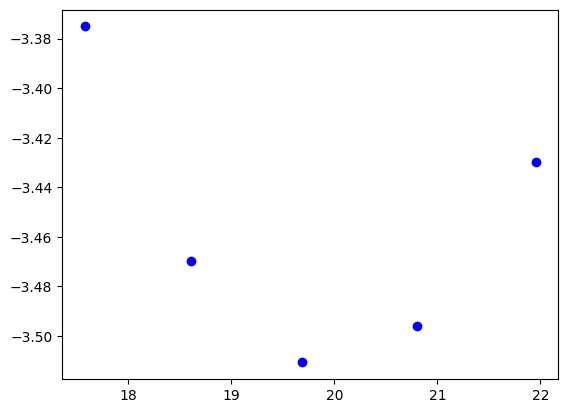

In [26]:
v,nrg = np.loadtxt('murn.in',dtype='float',unpack=True)
plt.scatter(v,nrg,color='blue')
plt.show()

#### Murnaghan Fit

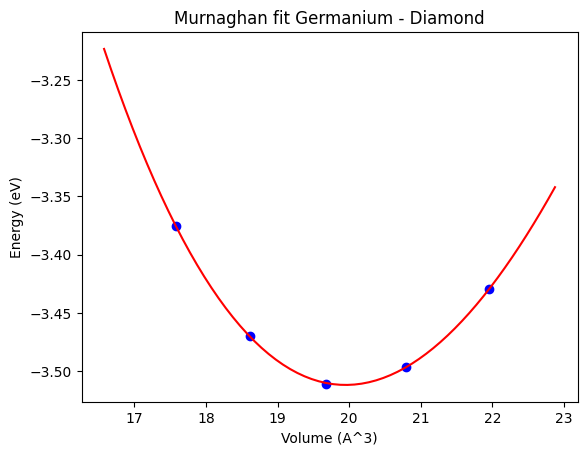

V0= 19.950691329936582 E0= -3.511797022305555 B= 0.8792902159480103


In [27]:
popt, pcov = curve_fit(murn, v, nrg,[18,-3.55,70,1.1])
plt.scatter(v,nrg,color='blue')
vout=np.arange(v[0]-1,v[-1]+1,0.1)
nrgOut=murn(vout,popt[0],popt[1],popt[2],popt[3])
plt.title('Murnaghan fit Germanium - Diamond')
plt.xlabel('Volume (A^3)')
plt.ylabel('Energy (eV)')
plt.plot(vout,nrgOut,color='red')
plt.show()
print('V0=',popt[0],'E0=',popt[1],'B=',popt[2])

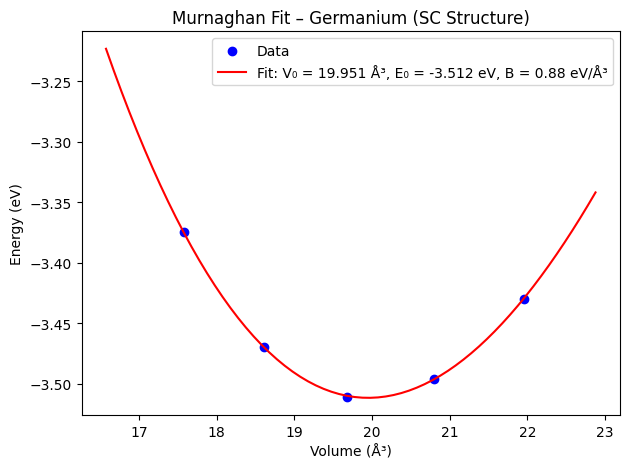

V0 = 19.950691329936582 E0 = -3.511797022305555 B = 0.8792902159480103


In [29]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Fit your data
popt, pcov = curve_fit(murn, v, nrg, [18, -3.55, 70, 1.1])

# Plot the data
plt.scatter(v, nrg, color='blue', label='Data')

# Fit curve
vout = np.arange(v[0]-1, v[-1]+1, 0.1)
nrgOut = murn(vout, *popt)

# Create label with fit parameters
label_str = f'Fit: V₀ = {popt[0]:.3f} Å³, E₀ = {popt[1]:.3f} eV, B = {popt[2]:.2f} eV/Å³'

# Plot fit
plt.plot(vout, nrgOut, color='red', label=label_str)

# Plot formatting
plt.title('Murnaghan Fit – Germanium (SC Structure)')
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.legend()
plt.tight_layout()
plt.show()

# Print the values
print('V0 =', popt[0], 'E0 =', popt[1], 'B =', popt[2])